# <center> Song Hotness prediction </center><center>MillionSongSubset sample </center>

This short analysis is about getting to know the MillionSongSubset database and see whether song hotness can be predicted and what kind of features are key in understanding a song's popularity.
More about the subset [here](http://millionsongdataset.com/).

## Importing packages and data 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ROOT_DIR = '.'
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')
def save_fig(img_name, fig_extension="png", res=300, verbose = False ):
    path = os.path.join(IMAGE_DIR, img_name + "." + fig_extension)
    if verbose:
        print("Saving figure", img_name)
    plt.savefig(path, format=fig_extension, dpi=res)

In [3]:
columns = ['duration', 'end_of_fade_in','key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out',
           'tempo', 'time_signature', 'time_signature_confidence', 'artist_familiarity', 'artist_hotttnesss', 'artist_id',
            'artist_latitude', 'artist_location', 'artist_longitude', 'artist_mbid', 'artist_name', 'release', 
           'song_hotttnesss', 'song_id', 'title', 'track_7digitalid', 'year',]

In [4]:
file_name = 'MillionSong_10ksample.csv'
data = pd.read_csv('data//' + file_name, usecols= columns)

## Data Exploration and data cleansing

In [5]:
data.dtypes

duration                     float64
end_of_fade_in               float64
key                            int64
key_confidence               float64
loudness                     float64
mode                           int64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
time_signature                 int64
time_signature_confidence    float64
artist_familiarity           float64
artist_hotttnesss            float64
artist_id                     object
artist_latitude              float64
artist_location               object
artist_longitude             float64
artist_mbid                   object
artist_name                   object
release                       object
song_hotttnesss              float64
song_id                       object
title                         object
track_7digitalid               int64
year                           int64
dtype: object

In [6]:
target = 'song_hotttnesss'

In [7]:
data.describe()[target]

count    5648.000000
mean        0.342822
std         0.247220
min         0.000000
25%         0.000000
50%         0.360371
75%         0.537504
max         1.000000
Name: song_hotttnesss, dtype: float64

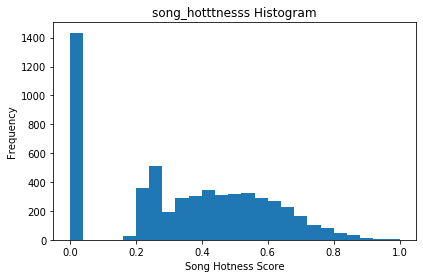

In [8]:
data[target].plot.hist( title = target + ' Histogram' ,  bins=25, figsize=(6.5, 4))
plt.xlabel('Song Hotness Score')
plt.show()

#### Removing rows where the target variable (song_hotness) is missing or zero

In [9]:
data_cleared = data.dropna(subset=[target]).copy()
data_cleared = data_cleared[ data_cleared['song_hotttnesss'] != 0]

**Check for features missing values and removing those rows**

In [10]:
def get_0_missing(data, columns):
    '''Count missing values for each columns (0 represents missing)'''
    n_missing = {}
    for c in columns:
        n_missing[c] = data[ data[c] == 0][c].count()
    return n_missing
print('Number of zeros in column:')
get_0_missing(data_cleared, columns), data_cleared.shape

Number of zeros in column:


({'duration': 0,
  'end_of_fade_in': 1299,
  'key': 479,
  'key_confidence': 209,
  'loudness': 0,
  'mode': 1320,
  'mode_confidence': 104,
  'start_of_fade_out': 0,
  'tempo': 6,
  'time_signature': 2,
  'time_signature_confidence': 874,
  'artist_familiarity': 9,
  'artist_hotttnesss': 51,
  'artist_id': 0,
  'artist_latitude': 0,
  'artist_location': 0,
  'artist_longitude': 0,
  'artist_mbid': 0,
  'artist_name': 0,
  'release': 0,
  'song_hotttnesss': 0,
  'song_id': 0,
  'title': 0,
  'track_7digitalid': 0,
  'year': 1502},
 (4214, 25))

In [11]:
# Also removing 0 values
data_cleared.replace({'tempo': 0,
                     'artist_hotttnesss': 0,
                     'artist_familiarity':0,
                     'time_signature': 0}, np.nan, inplace = True)

In [12]:
na_total = data_cleared.isna().sum()
na_total[na_total > 0]

tempo                    6
time_signature           2
artist_familiarity       9
artist_hotttnesss       51
artist_latitude       2558
artist_location       1510
artist_longitude      2558
artist_mbid            128
dtype: int64

### Selecting useful columns and removing rows where value is missing

In [13]:
num_cols = ['duration', 'loudness', 'mode','start_of_fade_out', 'tempo','artist_familiarity','artist_hotttnesss']
cat_cols = ['key', 'time_signature']

In [14]:
selected_columns = [target] + num_cols + cat_cols + ['year']
df = data_cleared[selected_columns].copy()
df.dropna(inplace= True)
df.shape

(4150, 11)

# EDA

In [15]:
df.describe()

,song_hotttnesss,duration,loudness,mode,start_of_fade_out,tempo,artist_familiarity,artist_hotttnesss,key,time_signature,year
count,4150.000000,4150.000000,4150.000000,4150.00000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000
mean,0.461679,240.848425,-9.552663,0.68747,231.937911,124.796975,0.628294,0.439380,5.319277,3.625301,1296.970843
std,0.167917,103.090732,5.043586,0.46358,101.202016,34.424850,0.135797,0.109984,3.516513,1.213361,954.135082
min,0.187895,10.344040,-41.691000,0.00000,10.344000,26.663000,0.015558,0.011562,0.000000,1.000000,0.000000
25%,0.319566,184.848530,-11.976750,0.00000,177.634250,97.980250,0.538138,0.366824,2.000000,4.000000,0.000000
50%,0.454118,229.628935,-8.403000,1.00000,220.380500,121.844500,0.620042,0.417456,6.000000,4.000000,1993.000000
75%,0.588922,279.901590,-5.981000,1.00000,269.180250,146.611750,0.716709,0.498669,8.000000,4.000000,2004.000000
max,1.000000,1686.752200,0.566000,1.00000,1686.752000,258.677000,1.000000,1.082503,11.000000,7.000000,2010.000000


In [16]:
corr = df.corr()
corr[target]

song_hotttnesss       1.000000
duration             -0.000132
loudness              0.211337
mode                 -0.030953
start_of_fade_out    -0.000733
tempo                 0.069634
artist_familiarity    0.505969
artist_hotttnesss     0.482986
key                   0.007795
time_signature        0.039370
year                  0.334230
Name: song_hotttnesss, dtype: float64

**'key' and 'time_signature' has low explanatory power but let's keep them and convert them to dummy labels**

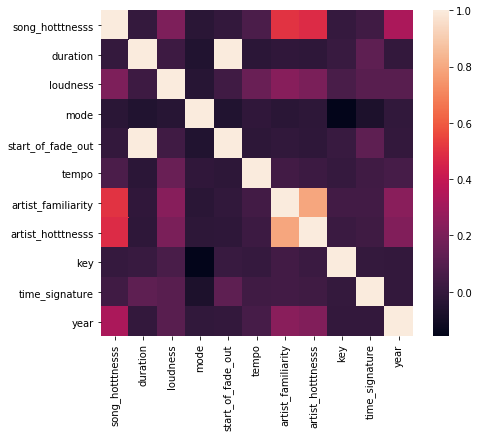

In [17]:
plt.figure(figsize=(7,6))
sns.heatmap(corr)
save_fig('Correlation Heatmap')
plt.show()

#### Quick look at the yearly distribution of data where release year is available (about only 50% of the data)

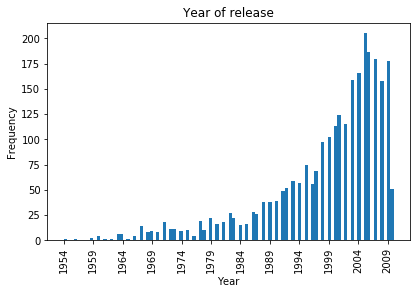

In [18]:
years_noNA = data_cleared['year'][data_cleared['year'] != 0]
years_noNA.plot.hist( title = 'Year of release' ,  bins=100, figsize=(6.5, 4))
plt.xlabel('Year')
years_uniq = years_noNA.unique()
plt.xticks(np.arange(min(years_uniq), max(years_uniq)+1, 5), rotation='vertical')
save_fig('Year of release')
plt.show()

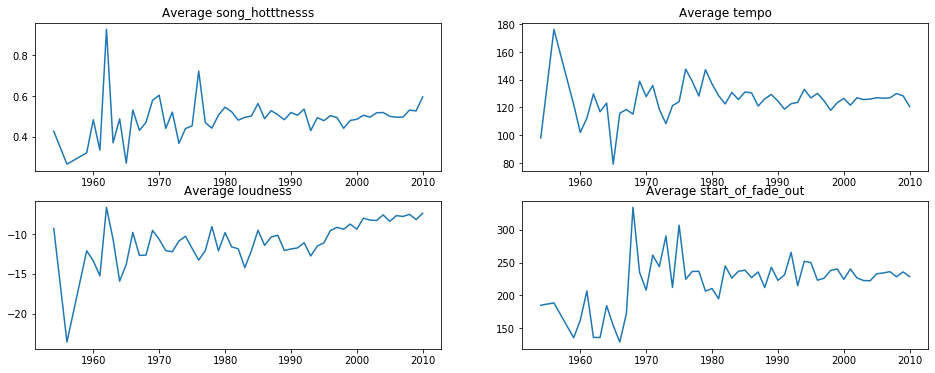

In [19]:
yearly_means = data_cleared.groupby('year').mean()
plot_cols = [target, 'tempo', 'loudness', 'start_of_fade_out']
fig, axs = plt.subplots(2,2, figsize=(16,6) )
for i, col in enumerate(plot_cols):
    plt.subplot(2,2, i+1)
    plt.plot( yearly_means[col][1:] )
    plt.title('Average ' + col)
save_fig('Yearly changes')
plt.show()

The averages are quite volatile before 1980 becuase of low sample size. There seems to be correlation between years and other features but since we are a lot of missing values in the year label, it will be ignored for now.

In [20]:
len(df.columns)

11

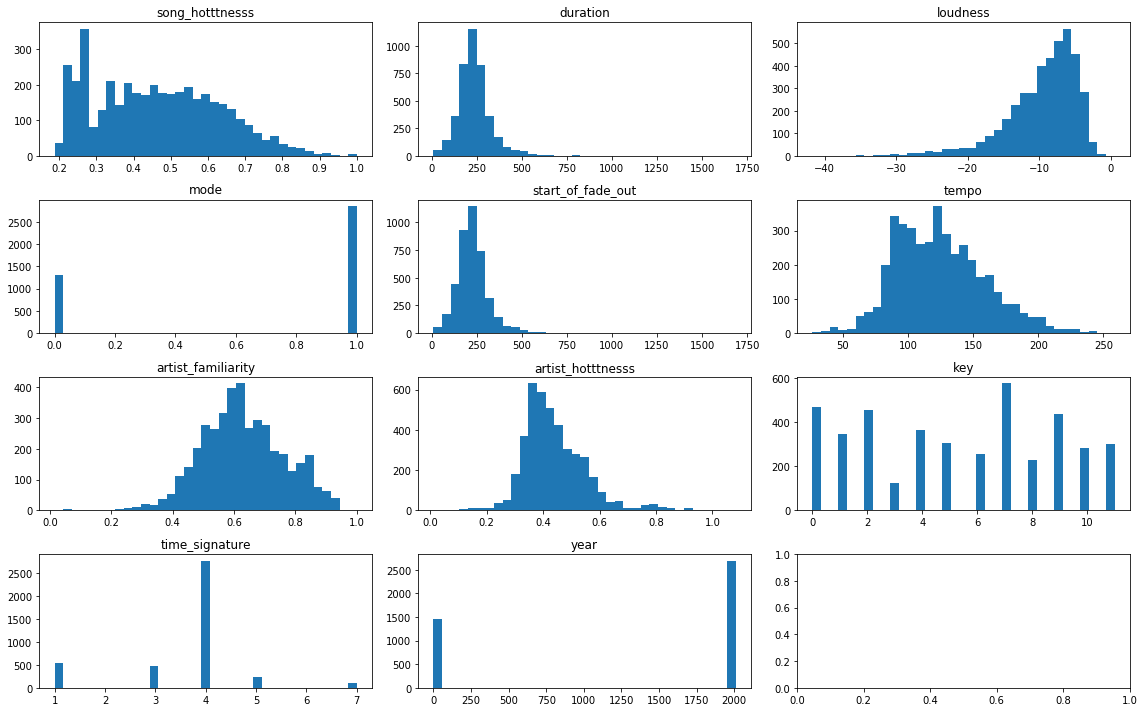

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(16, 10))
for i, label in enumerate(df.columns):
    plt.subplot(4,3,i+1).hist(df[label], bins = 35 )
    plt.title(label)
    #plt.grid(True)
plt.tight_layout()
save_fig('Histplot for features')
plt.show()

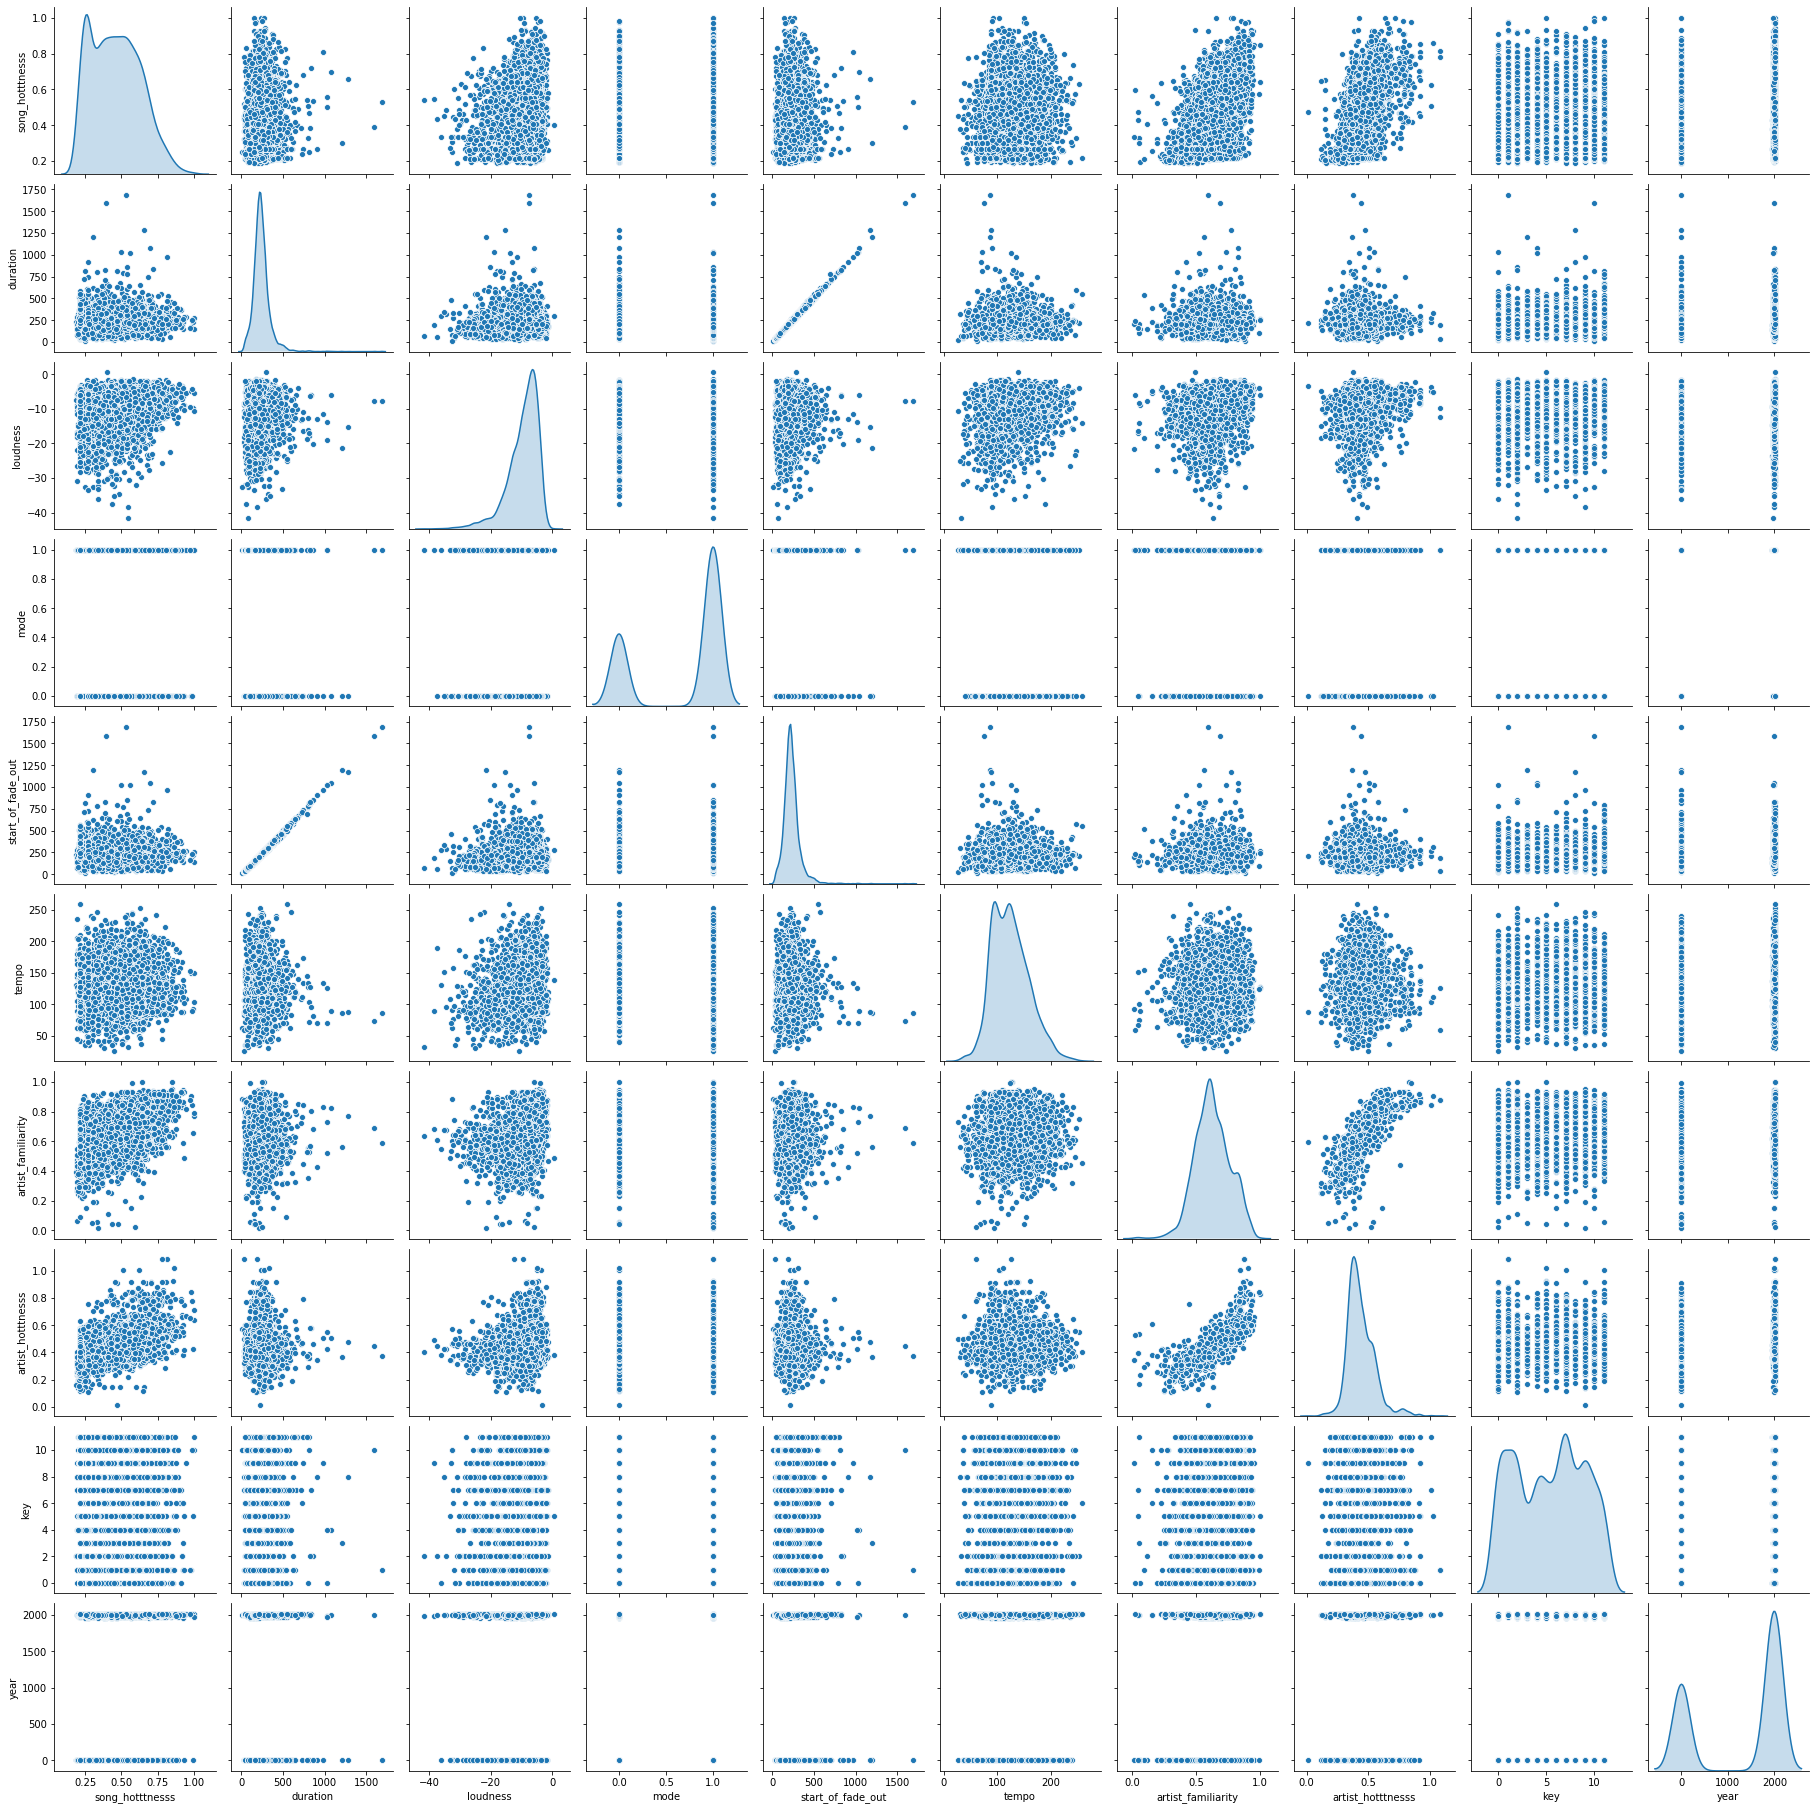

In [22]:
sns.pairplot(df.drop('time_signature', axis=1), diag_kind ='kde' )
save_fig('Pariplot_df')

## Categorizing the target variable
Since song_hotness is a subjective measure, I decided it is better to make a 3 categories.

In [23]:
def create_bins(column, bins):
    bin_labels = [x for x in range( len(bins)-1 ) ]
    y_cut = pd.cut(column, bins=bins, labels = bin_labels )
    return y_cut
def cat_dist(column, isnp = False):
    if isnp:
        unique, counts = np.unique(column, return_counts=True)
        return dict(zip(unique, counts/counts.sum()))
    else:
        return column.value_counts()/column.value_counts().sum()

Arbirtrarily selecting bin size

In [24]:
# Creating three categories manually.
# above 0.7 the song is hot
# between 0.4 and 0.7 the song is ok
# below 0.4 the song is not sexy
target = 'song_hotttnesss'
bins = [0., 0.4, 0.7, 1.]
#bins = [0, 0.2, 0.4, 0.6, 0.8, 1.]
y_cut = create_bins(df[target], bins)
df['song_hot_cat'] = y_cut

In [25]:
cat_dist(y_cut)

1    0.518795
0    0.393976
2    0.087229
Name: song_hotttnesss, dtype: float64

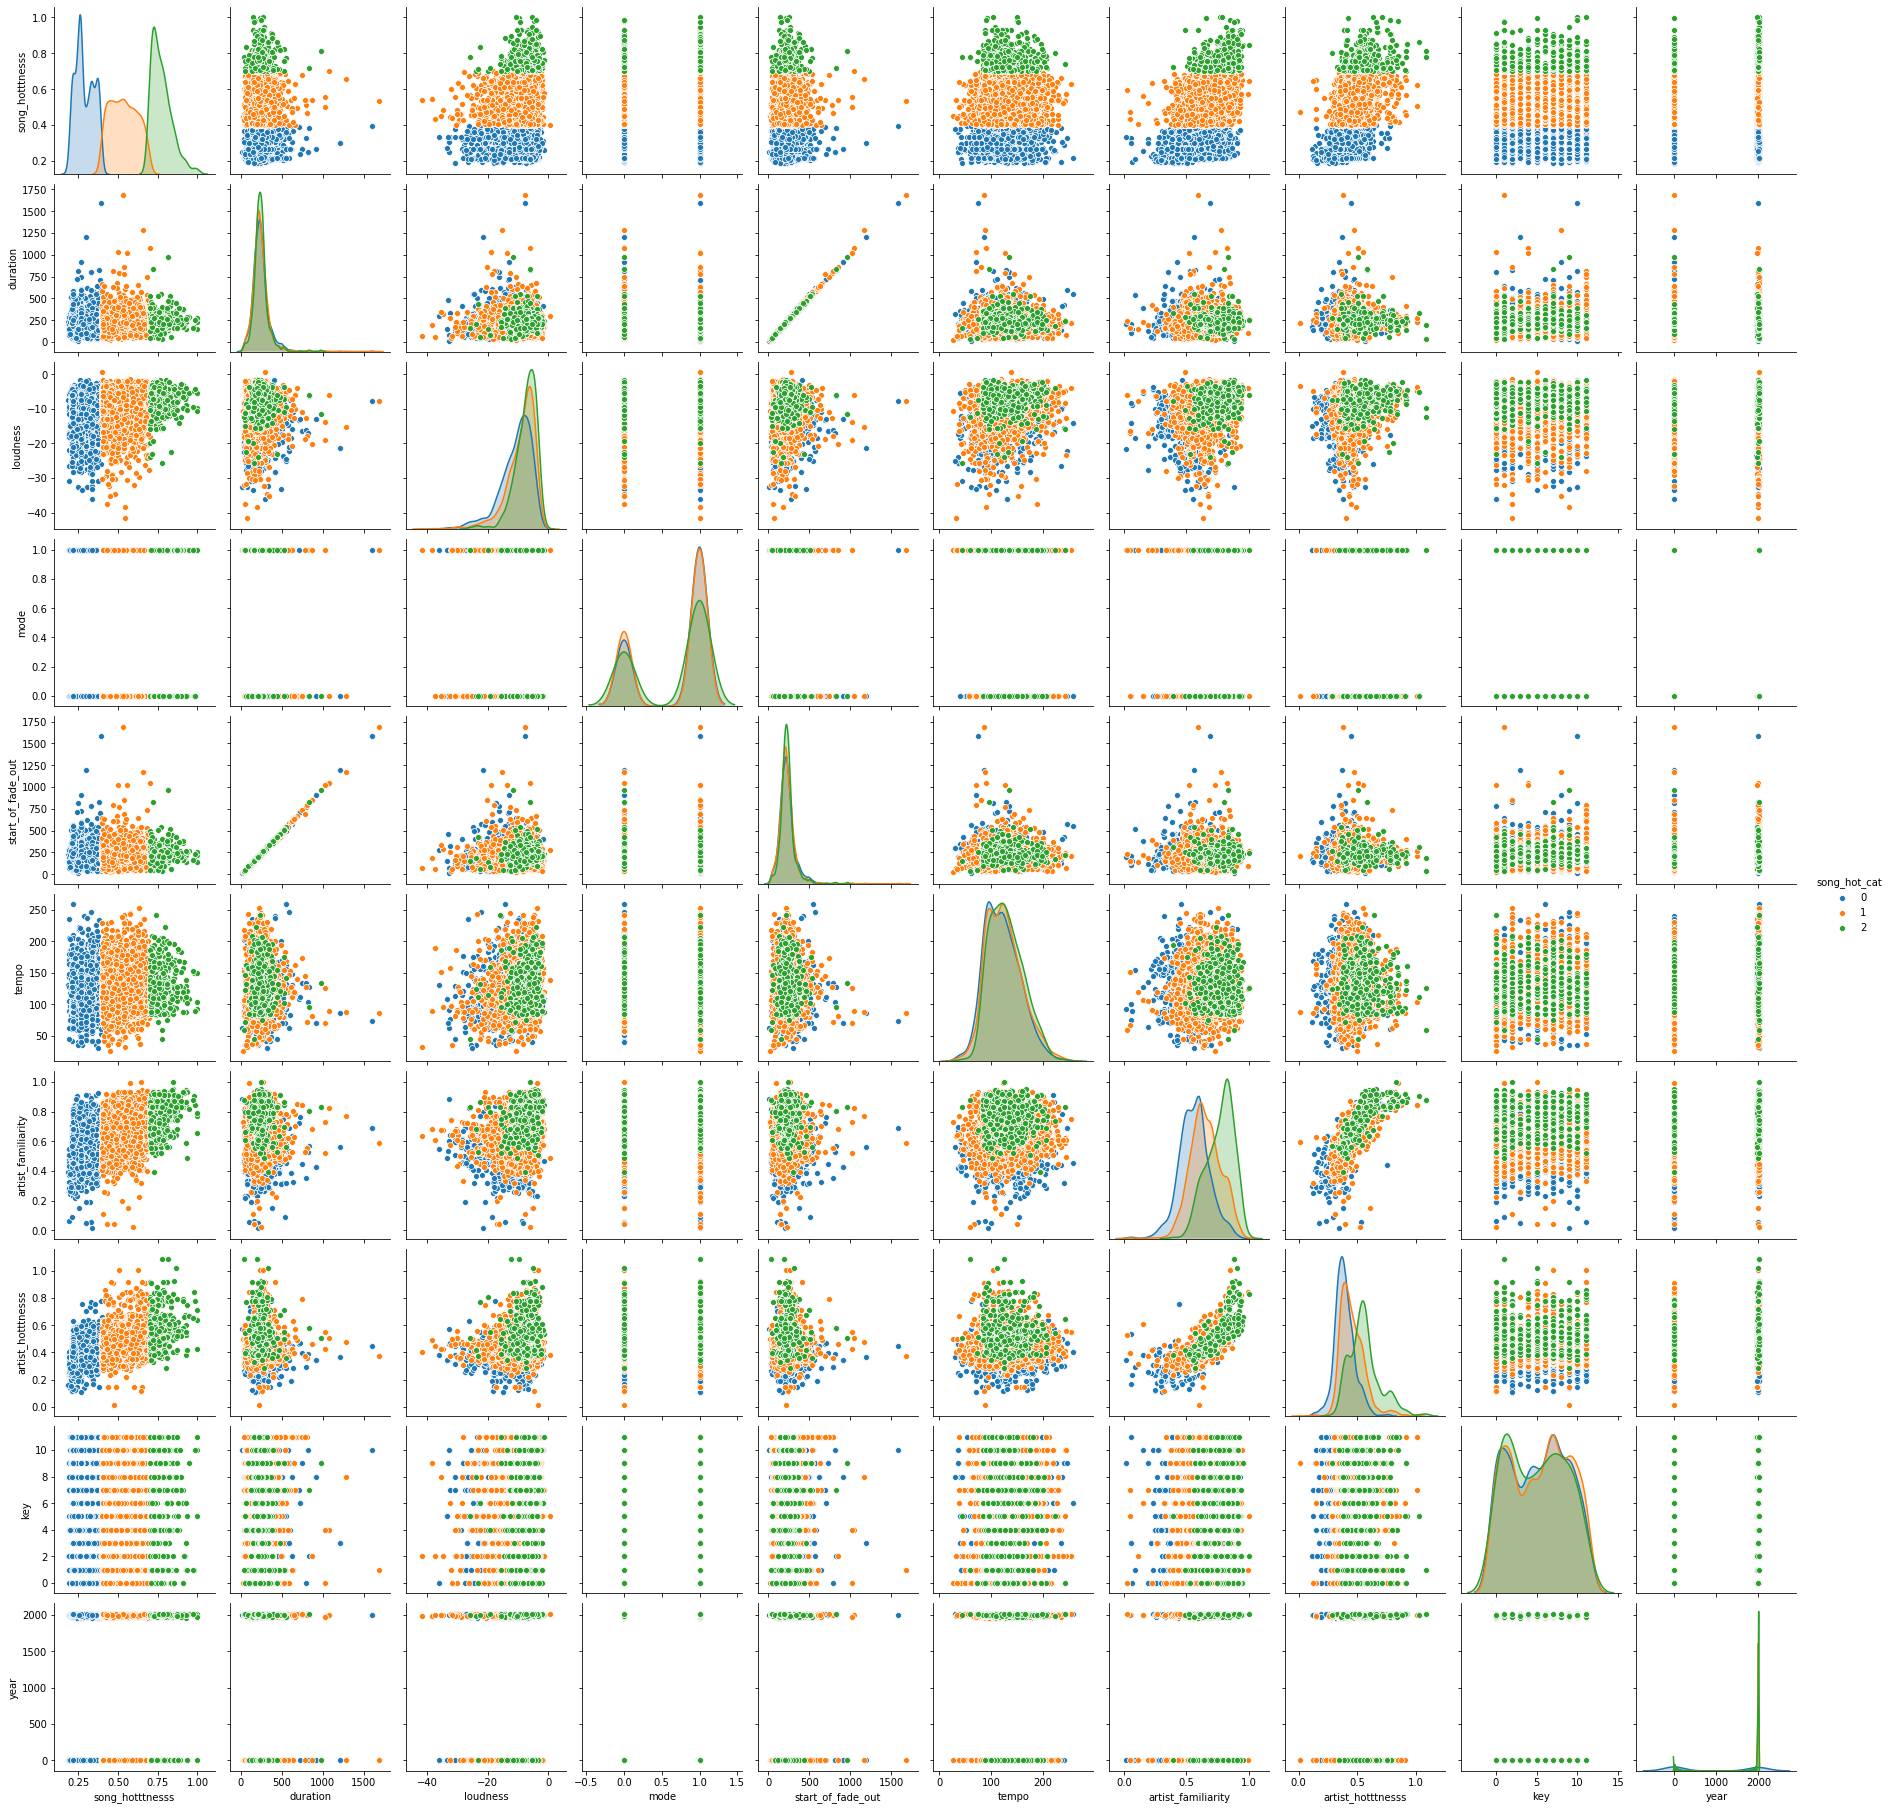

In [26]:
sns.pairplot(df.drop('time_signature', axis=1), hue = 'song_hot_cat' , diag_kind ='kde' )
save_fig('Pariplot_df_hot_cat')

# Pipelines

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
cat_cols

['key', 'time_signature']

In [29]:
num_pipeline = Pipeline([ ('std_scaler', StandardScaler())  ])
cat_encoder = OneHotEncoder(drop = 'first', sparse = True)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", cat_encoder, cat_cols),
    ])

# Models

In [30]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.tree import export_graphviz
from graphviz import Source
if 'graphviz' not in os.environ["PATH"]:
    os.environ["PATH"]  += ';C:\\Anaconda\\Library\\bin\\graphviz'

### RandomForrest

In [31]:
def train_test(X, y):
    # Random sampling of data (uniform distribution)
    #X, y = shuffle(X, y, random_state= 42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [32]:
target = 'song_hot_cat'

In [33]:
X = full_pipeline.fit_transform(df)
y = df[target].values
X_train, X_test, y_train, y_test = train_test(X, np.array(y))

#### Get feature impotances to check whether dummies are needed

In [34]:
#rnd_clf = RandomForestClassifier(n_estimators=100, max_depth =100, min_samples_leaf = 5, n_jobs= -1)
rfc_feature = RandomForestClassifier(n_estimators=100, max_depth =100, n_jobs= -1)
rfc_feature.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

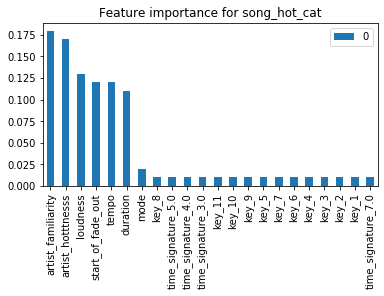

In [35]:
# Get dummy column names
cat_encoder.fit(df[cat_cols])
dummy_names = list(cat_encoder.get_feature_names(cat_cols))
# Check the feature importance
pd.DataFrame( np.round(rfc_feature.feature_importances_, 2), 
             num_cols + dummy_names, ).sort_values(0, ascending=False).plot.bar(figsize=(6,3))
t = 'Feature importance for song_hot_cat'
plt.title(t)
save_fig(t)

**As expected categorical labels can be thrown out of the model because they are redundant**

**Most important features are related to the artist success meaning that a song is most likely to be popular if the artist is already popular.**

--------------------------
### Only using numerical columns

In [36]:
def print_cross_score(cross_scores):
    print('Cross Val Accuracy scores \nMean: {}\nStd: {}'.format(np.round(cross_scores.mean(),3),  np.round(cross_scores.std(),4) ))

def print_acc(y, X, model):
    print('Accuracy of the model:\n{}'.format(  np.round(accuracy_score(y, model.predict(X)),3  )))

def conf_matrix(y, X, model):
    conf_mx = confusion_matrix(y, model.predict(X))
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    return np.round(norm_conf_mx, 3)

In [37]:
X = num_pipeline.fit_transform(df[num_cols])
y = np.array(df[target].values)
X_train, X_test, y_train, y_test = train_test(X, y)

**The most frequent class frequency is 52% so this will be the accuracy baseline.**

Let's see how a a random model performs

In [38]:
rfc = RandomForestClassifier(n_estimators=10, max_depth =10, n_jobs= -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [39]:
print_acc(y_train, X_train, rfc)

Accuracy of the model:
0.797


In [40]:
rfc_scores = cross_val_score(rfc, X_train, y_train, scoring = "accuracy", cv = 10)
print_cross_score(rfc_scores)

Cross Val Accuracy scores 
Mean: 0.591
Std: 0.0203


The accuracy of 59% is not much better than the baseline (8pp or 16% higher).

**The train and cross validation score difference is really high meaning the above model is quite overfitting the training set.**

**Let's regularize the model using grid search as well to find better hyperparameters:**

In [41]:
rfc = RandomForestClassifier(random_state = 67, n_jobs= -1)
param_grid = [
    {'n_estimators' : [5, 10] , 'max_depth': [3, 5, 6], 
     'min_samples_leaf': [5, 10], 'max_leaf_nodes': [5, 10]} ]
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=67,
                                    

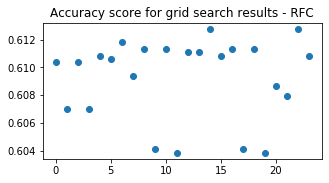

In [42]:
pd.DataFrame(grid_search.cv_results_).mean_test_score.plot(style='o', figsize=(5,2.5))
plt.title('Accuracy score for grid search results - RFC')
plt.show()

In [43]:
rfc_best = grid_search.best_estimator_
# saving the model
joblib.dump(rfc_best, "models\\rfc_best.pkl")
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'n_estimators': 5}

In [44]:
print_acc(y_train, X_train, rfc_best)

Accuracy of the model:
0.619


In [45]:
rfc_best_scores = cross_val_score(rfc_best, X_train, y_train, scoring = "accuracy", cv = 10)
print_cross_score(rfc_best_scores)

Cross Val Accuracy scores 
Mean: 0.608
Std: 0.0213


**The model now seems to be ok and does not seem to overfit the training data. Check the confusion matrix and visualise one tree from the forrest.**

In [46]:
print('Rows: actual class | Cols: predicted class')
conf_matrix(y_train, X_train, rfc_best)

Rows: actual class | Cols: predicted class


array([[0.504, 0.495, 0.001],
       [0.194, 0.799, 0.007],
       [0.024, 0.916, 0.059]])

**The model predicts most songs to be in the 'ok' category, this is because this is the most frequent class. It totally fails at predicting which song is hot (only 6%)- this is due to low sample size in category and low explanatory power in the labels (only two labels have meaningful power). The binning thresholds could be changed to make more equal sized bins.**

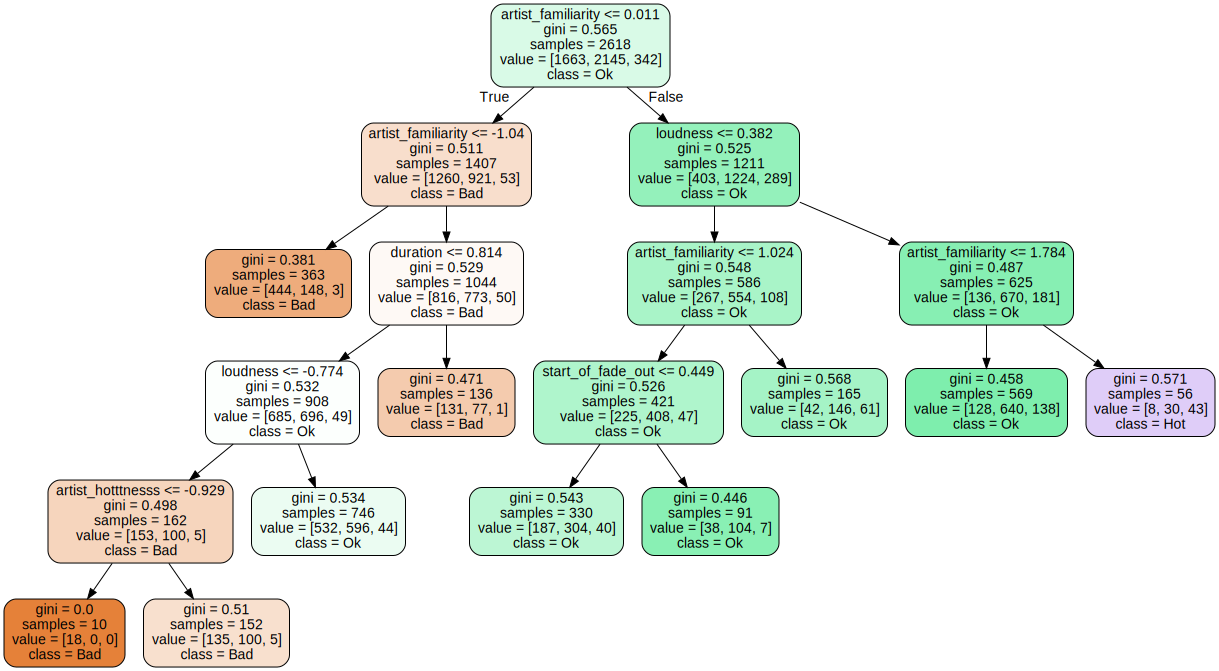

In [47]:
tree_graph_name = 'models\\RFC_tree.dot'
export_graphviz(rfc_best.estimators_[0],
                 out_file= tree_graph_name,
                 feature_names=num_cols,
                 class_names=['Bad','Ok','Hot'],
                 rounded=True, filled=True)
Source.from_file(tree_graph_name)

**Because only a few labels have predictive power, a really simple model is enough to improve a little on the baseline performance (and to not overfit). The model, though, does not perform well. More feature engineering might help. Also, the song_hotness and artist_hotness variable are probably generated in the same way so predicting from one to another is doubtful**

**Finally look at how it performs on the test set:**

In [48]:
print_acc(y_test, X_test, rfc_best)

Accuracy of the model:
0.62


**Let's try an even simpler model just for fun**
## SVC

In [49]:
SVC_model = SVC(kernel="poly", degree=2,  C=10, coef0= 0.1, tol= 0.01 )
SVC_scores = cross_val_score(SVC_model, 
                         X_train, y_train, scoring = "accuracy", cv = 10)
print_cross_score(SVC_scores)

Cross Val Accuracy scores 
Mean: 0.601
Std: 0.0246


In [50]:
SVC_model.fit(X_train, y_train)
print_acc(y_train, X_train, SVC_model)

Accuracy of the model:
0.606


In [51]:
print_acc(y_test, X_test, SVC_model)

Accuracy of the model:
0.607
